In [1]:
import sys
sys.path.append("../../")

import numpy as np
import scipy.linalg as sla
import matplotlib.pyplot as plt
from methods.minimization import DecentralizedGD, LoggerDecentralized
from oracles.minimization import QuadraticOracle

%matplotlib inline

In [2]:
def gen_mix_mat(n: int) -> np.ndarray:
    """
    Metropolis weights for ring graph over n nodes
    """

    mat = np.zeros((n, n))
    ids = np.arange(n)
    mat[ids, ids] = 1 / 3
    mat[ids[:-1], ids[1:]] = 1 / 3
    mat[ids[1:], ids[:-1]] = 1 / 3
    mat[0, n - 1] = 1 / 3
    mat[n - 1, 0] = 1 / 3
    return mat

In [3]:
d = 20
num_nodes = 10

x_0 = np.random.rand(num_nodes * d).reshape(num_nodes, d)
mix_mat = gen_mix_mat(num_nodes)  # change this
oracles = [QuadraticOracle(m / num_nodes * np.diag(np.ones(d)), np.zeros(d))
           for m in range(1, num_nodes + 1)]  # change this

logger = LoggerDecentralized()
method = DecentralizedGD(
    oracle_list=oracles,
    stepsize=0.01,
    mix_mat=np.kron(mix_mat, np.eye(d).astype(np.float32)),
    x_0=x_0,
    logger=logger,
    mix_mat_repr="kronecker"
)
method.run(max_iter=1000)

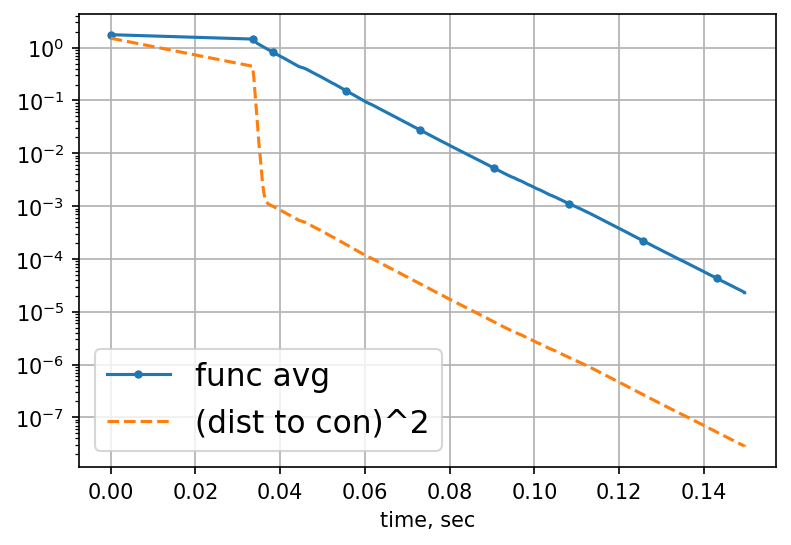

In [4]:
plt.figure(dpi=150)
ax = plt.gca()
ax.plot(logger.time, logger.func_avg, '.-', markevery=0.1, label='func avg')
ax.plot(logger.time, logger.sq_dist_to_con, '--', label='(dist to con)^2')
ax.set_xlabel('time, sec', fontsize=10)
ax.set_yscale('log')
ax.grid()
ax.legend(fontsize=15)